In [1]:
! pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip freeze > requirements.txt

In [3]:
import pandas as pd

# Carga del archivo CSV
df = pd.read_csv(r'C:\Users\bianc\OneDrive\Escritorio\proyectofinal\2017PurchasePricesDec_clean.csv')

In [4]:
print(df.head())  # Muestra las primeras filas

   Brand                  Description  Price   Size Volume  Classification  \
0     58  Gekkeikan Black & Gold Sake  12.99  750mL    750               1   
1     62     Herradura Silver Tequila  36.99  750mL    750               1   
2     63   Herradura Reposado Tequila  38.99  750mL    750               1   
3     72         No. 3 London Dry Gin  34.99  750mL    750               1   
4     75    Three Olives Tomato Vodka  14.99  750mL    750               1   

   PurchasePrice  VendorNumber                   VendorName  
0           9.28          8320  SHAW ROSS INT L IMP LTD      
1          28.67          1128  BROWN-FORMAN CORP            
2          30.46          1128  BROWN-FORMAN CORP            
3          26.11          9165  ULTRA BEVERAGE COMPANY LLP   
4          10.94          7245  PROXIMO SPIRITS INC.         


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df.rename(columns={
   
    'Brand': 'Marca',
    'Description': 'Descripción',
    'Price': 'Precio',
    'Size': 'Tamaño',
    'Volume': 'Volumen',
    'Classification': 'Clasificación',
    'PurchasePrice': 'PrecioCompra',
    'VendorNumber': 'NúmeroProveedor',
    'VendorName': 'NombreProveedor'
}, inplace=True)

In [7]:
print(df.head())  # Muestra las primeras filas

   Marca                  Descripción  Precio Tamaño Volumen  Clasificación  \
0     58  Gekkeikan Black & Gold Sake   12.99  750mL     750              1   
1     62     Herradura Silver Tequila   36.99  750mL     750              1   
2     63   Herradura Reposado Tequila   38.99  750mL     750              1   
3     72         No. 3 London Dry Gin   34.99  750mL     750              1   
4     75    Three Olives Tomato Vodka   14.99  750mL     750              1   

   PrecioCompra  NúmeroProveedor              NombreProveedor  
0          9.28             8320  SHAW ROSS INT L IMP LTD      
1         28.67             1128  BROWN-FORMAN CORP            
2         30.46             1128  BROWN-FORMAN CORP            
3         26.11             9165  ULTRA BEVERAGE COMPANY LLP   
4         10.94             7245  PROXIMO SPIRITS INC.         


Elimino las columnas que no voy a utilizar:

In [8]:
df.drop(columns=['Tamaño', 'Volumen', 'NombreProveedor'], inplace=True)

In [10]:
! pip freeze > requirements.txt

In [11]:
print(df.info())  # Información de columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marca            12261 non-null  int64  
 1   Descripción      12261 non-null  object 
 2   Precio           12261 non-null  float64
 3   Clasificación    12261 non-null  int64  
 4   PrecioCompra     12261 non-null  float64
 5   NúmeroProveedor  12261 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 574.9+ KB
None


Visualización del tamaño del Dataframe (Filas y Columnas):

In [12]:
import numpy as np

In [13]:
np.shape(df)

(12261, 6)

Conversión del tipo de datos:

In [15]:
df['Clasificación'] = pd.to_numeric(df['Clasificación'], errors='coerce')                                    
df['Marca'] = pd.to_numeric(df['Marca'], errors='coerce')
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
df['NúmeroProveedor'] = pd.to_numeric(df['NúmeroProveedor'], errors='coerce')

In [16]:
print(df.columns)

Index(['Marca', 'Descripción', 'Precio', 'Clasificación', 'PrecioCompra',
       'NúmeroProveedor'],
      dtype='object')


In [17]:
df.isnull().sum() #busco nulos

Marca              0
Descripción        0
Precio             0
Clasificación      0
PrecioCompra       0
NúmeroProveedor    0
dtype: int64

In [18]:
duplicados = df[df.duplicated()]

print(duplicados)

Empty DataFrame
Columns: [Marca, Descripción, Precio, Clasificación, PrecioCompra, NúmeroProveedor]
Index: []


No se encontraron duplicados

In [19]:
print(df.info())  # Información de columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marca            12261 non-null  int64  
 1   Descripción      12261 non-null  object 
 2   Precio           12261 non-null  float64
 3   Clasificación    12261 non-null  int64  
 4   PrecioCompra     12261 non-null  float64
 5   NúmeroProveedor  12261 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 574.9+ KB
None


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

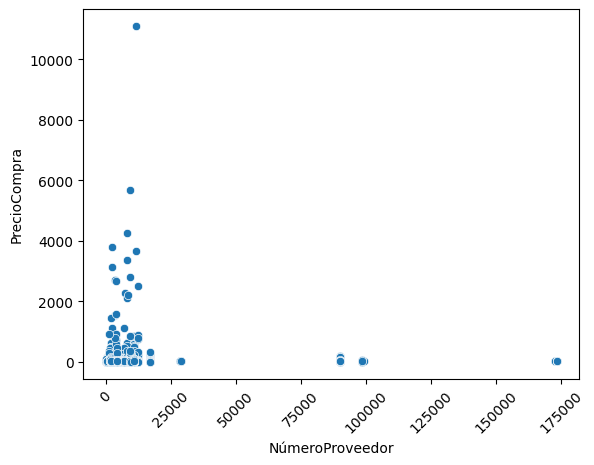

In [21]:
# Relación entre NúmeroProveedor y PrecioCompra
sns.scatterplot(data=df, x='NúmeroProveedor', y='PrecioCompra')
plt.xticks (rotation=45)
plt.show()

In [22]:
pip install sqlalchemy pyodbc

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
def calcular_estadisticas(data): 
    for columna in data.columns:
        if data[columna].dtype == 'float64' or data[columna].dtype == 'int64':
            print(columna)
            print('Mediana:', data[columna].median())
            print('Varianza: ', np.around((data[columna].var()),decimals=2)) # Casteo (redondeo) a 2 decimales
            print('Rango:', data[columna].max() - data[columna].min())
            print('Moda:', data[columna].mode()[0])
            print('--------------------------------')

calcular_estadisticas(df)

Marca
Mediana: 18788.0
Varianza:  156963399.05
Rango: 90573
Moda: 58
--------------------------------
Precio
Mediana: 15.99
Varianza:  42498.31
Rango: 13999.9
Moda: 9.99
--------------------------------
Clasificación
Mediana: 2.0
Varianza:  0.21
Rango: 1
Moda: 2
--------------------------------
PrecioCompra
Mediana: 10.65
Varianza:  24393.11
Rango: 11111.03
Moda: 6.53
--------------------------------
NúmeroProveedor
Mediana: 7153.0
Varianza:  361291987.26
Rango: 173355
Moda: 4425
--------------------------------


In [24]:
# Guardar el DataFrame transformado
df.to_csv(r'C:\Users\bianc\OneDrive\Escritorio\proyectofinal\Limpieza2017PurchasePricesDec', index=False)   

In [25]:
#carga archivo csv
df2 = pd.read_csv(r'C:\Users\bianc\OneDrive\Escritorio\proyectofinal\Limpieza2017PurchasePricesDec')

In [26]:
print(df2.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marca            12261 non-null  int64  
 1   Descripción      12261 non-null  object 
 2   Precio           12261 non-null  float64
 3   Clasificación    12261 non-null  int64  
 4   PrecioCompra     12261 non-null  float64
 5   NúmeroProveedor  12261 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 574.9+ KB
None


In [30]:
import pyodbc
import pandas as pd
from sqlalchemy import create_engine, types

PrecioCompra_df = pd.read_csv(r'C:\Users\bianc\OneDrive\Escritorio\proyectofinal\Limpieza2017PurchasePricesDec')
# Asegurar que las columnas tengan los tipos de datos correctos
PrecioCompra_df['Marca'] = PrecioCompra_df['Marca'].astype(int)
PrecioCompra_df['Descripción'] = PrecioCompra_df['Descripción'].astype(str)  # Convertir a string para usar NVARCHAR en SQL
PrecioCompra_df['Precio'] = PrecioCompra_df['Precio'].astype(float)
PrecioCompra_df['Clasificación'] =PrecioCompra_df['Clasificación'].astype(int)
PrecioCompra_df['PrecioCompra'] = PrecioCompra_df['PrecioCompra'].astype(float)
PrecioCompra_df['NúmeroProveedor'] = PrecioCompra_df['NúmeroProveedor'].astype(int)

# Crear la conexión con SQL Server usando autenticación de Windows
# Usando el nombre del servidor SQLEXPRESS y Trusted Connection
engine = create_engine('mssql+pyodbc://BIANCA\SQLEXPRESS/PremiumDrinks?trusted_connection=yes&driver=ODBC+Driver+18+for+SQL+Server&TrustServerCertificate=yes')

# Especificar los tipos de datos para cada columna en SQL Server
dtype_sql = {
    'Marca': types.INTEGER,  # INTEGER para la columna Marca
    'Descripción': types.VARCHAR(length=255),  # VARCHAR para la columna Descripción
    'Precio': types.FLOAT,  # FLOAT para la columna Precio
    'Volumen': types.INTEGER,  # INTEGER para la columna Volumen
    'Clasificación': types.INTEGER,  # INTEGER para la columna Clasificación
    'PrecioCompra': types.FLOAT,  # FLOAT para la columna PrecioCompra
    'NúmeroProveedor': types.INTEGER,  # INTEGER para la columna Número de Proveedor
    'NombreProveedor': types.VARCHAR(length=255),  # VARCHAR para la columna Nombre del Proveedor
}

# Exportar el DataFrame a una tabla SQL llamada PrecioCompra
PrecioCompra_df.to_sql('PrecioCompra', con=engine, if_exists='replace', index=False, dtype=dtype_sql)

print("Datos exportados exitosamente a la tabla PrecioCompra en la base de datos PremiumDrinks")

Datos exportados exitosamente a la tabla PrecioCompra en la base de datos PremiumDrinks
